# Classification Lab (Decision Trees)
Create your own majority voting based on the WINE dataset!

In [1]:
import pandas as pd

from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load and prepare data set

Load the wine dataset!

In [2]:
#load the sklearn wine dataset 
wine = datasets.load_wine(return_X_y=False)

Create a data frame with the wine dataset and show its content

In [3]:
#Create a data frame with the features of the wine dataset
df=pd.DataFrame(wine.data,columns=wine.feature_names)

#Add the label of the wine data set to your data frame
df['label']=wine.target

#shuffle data frame
df=df.sample(frac=1)

#Show data frame content and check the shape of your dataframe (number of rows and columns)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
26,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195.0,0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2


# Explore data set

Show descriptive statistics of your data frame

In [4]:
#Show descriptive statistics of your data frame 
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Create a correlations heat map using the wine data frame

<Axes: >

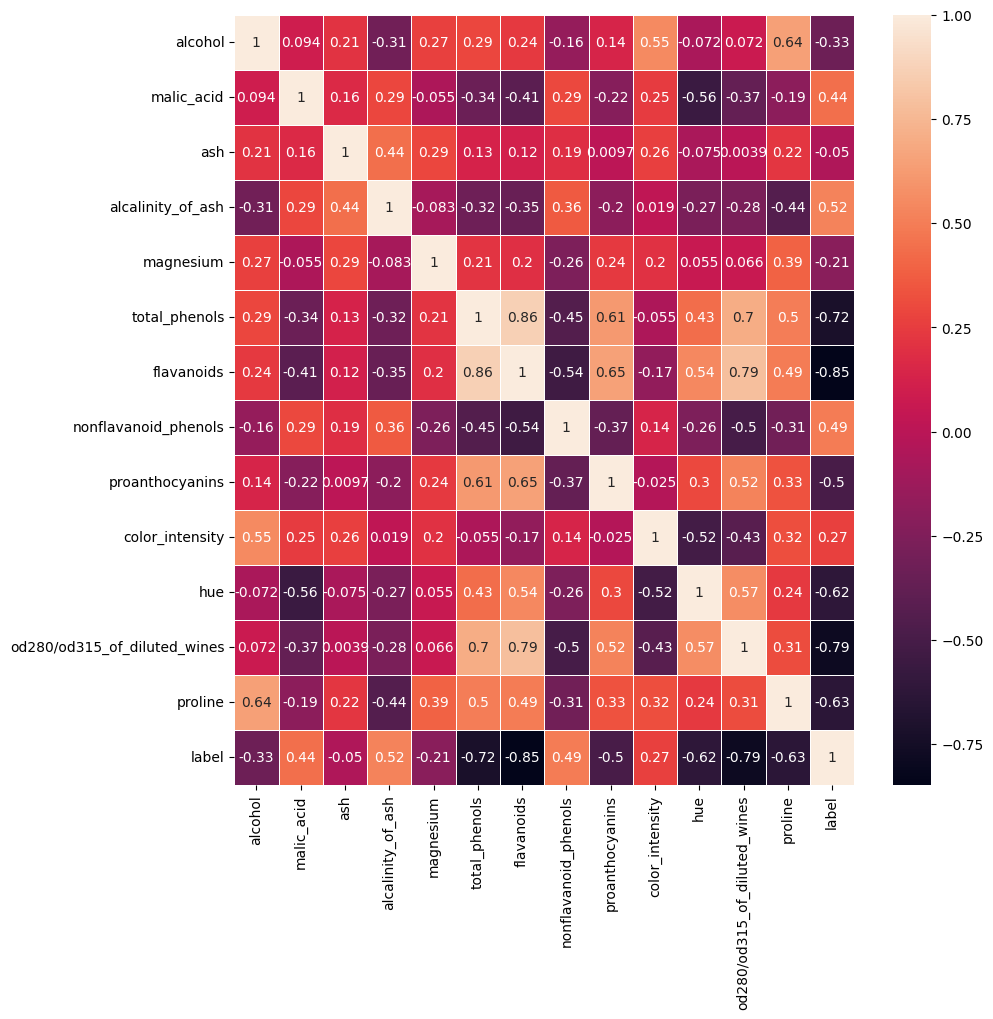

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculate correlations between all features of your data frame 
corr = df.corr

# Display correlations as a heatmap / correlation matrix
plt.figure(figsize=(10,10)) 
sns.heatmap(corr(), annot=True, linewidths=.5)

Create histograms for the first 6 features using the dataframe method "hist"

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'alcalinity_of_ash'}>,
        <Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>]], dtype=object)

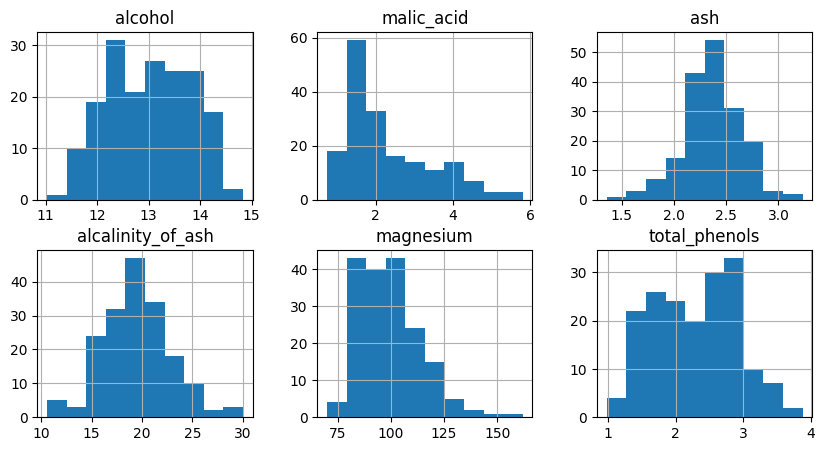

In [11]:
#Create histograms for the first 6 features using the dataframe method "hist"
#use figsize=(10,5) and a layout of 2 rows and 3 columns
df.iloc[:,0:6].hist(figsize=(10,5), layout=(2,3))

# Model Building

Split data into training and test data (120 training examples)

In [12]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2


In [53]:
num_training_examples=120
num_features=13

#Training Data
train_features=df.iloc[:num_training_examples,:num_features]
train_labels=df.iloc[:num_training_examples]['label']

#Test Data (the remaining examples)
#Add lines of code to create test data (features and labels)
test_features=df.iloc[num_training_examples:,:num_features]
test_labels=df.iloc[num_training_examples:]['label']

#check results
print("Train Features:" ,train_features.shape, "Train Labels:", train_labels.shape)   
print("Test Features:" ,test_features.shape, "Test Labels:", test_labels.shape)  

Train Features: (120, 13) Train Labels: (120,)
Test Features: (58, 13) Test Labels: (58,)


Initialize and fit a classification tree, gradient boosted tree and bagging tree model, using the training data

In [54]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_features, train_labels)

gbt = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=1.0,random_state=0)
gbt = gbt.fit(train_features, train_labels)

bagt= BaggingClassifier(tree.DecisionTreeClassifier(),
                        n_estimators=10, random_state=0)
bagt = bagt.fit(train_features, train_labels)

# Model application to test data

Create three seperate predictions for your test features and append them in a list of lists

In [55]:
#create predictions for test data using the three decision tree models
bagt_predict=bagt.predict(test_features)    
gbt_predict=gbt.predict(test_features)
dt_predict=dt.predict(test_features)

bagt_predict

array([0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0])

In [56]:
#initialize a list for your prediction values y_pred
y_pred= []

#store results of each of the three predictions in list of lists
for i in range(0,test_features.shape[0]):
    y_pred.append([int(bagt_predict[i]),
                   int(gbt_predict[i]),
                   int(dt_predict[i])])


# import numpy as np
# y_pred = np.concatenate([bagt_predict.reshape(-1,1), gbt_predict.reshape(-1,1), dt_predict.reshape(-1,1)], axis=1)

# y_pred = list(y_pred)

y_pred

[[0, 0, 0],
 [2, 2, 2],
 [2, 2, 2],
 [1, 1, 1],
 [0, 2, 0],
 [0, 0, 0],
 [2, 2, 2],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [0, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 0, 0],
 [1, 1, 1],
 [2, 1, 2],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 2],
 [1, 1, 1],
 [2, 1, 2],
 [2, 2, 2],
 [1, 2, 1],
 [2, 2, 2],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [2, 2, 2],
 [2, 2, 2],
 [2, 2, 1],
 [0, 0, 0],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 2, 1],
 [1, 2, 1],
 [2, 2, 2],
 [1, 2, 1],
 [0, 0, 0],
 [2, 2, 2],
 [0, 0, 0]]

Loop y_pred and use the most_frequent function to define the most frequent class

In [57]:
#function which returns most frequent value of a list
def most_frequent(List): 
    return max(set(List), key = List.count) 

for i in range(0,len(y_pred)):
    #use the most_frequent method for a majority voting and print the result
    print(f"Most frequent class for test example {i}:", most_frequent(y_pred[i]))

Most frequent class for test example 0: 0
Most frequent class for test example 1: 2
Most frequent class for test example 2: 2
Most frequent class for test example 3: 1
Most frequent class for test example 4: 0
Most frequent class for test example 5: 0
Most frequent class for test example 6: 2
Most frequent class for test example 7: 0
Most frequent class for test example 8: 1
Most frequent class for test example 9: 1
Most frequent class for test example 10: 1
Most frequent class for test example 11: 1
Most frequent class for test example 12: 0
Most frequent class for test example 13: 0
Most frequent class for test example 14: 0
Most frequent class for test example 15: 0
Most frequent class for test example 16: 1
Most frequent class for test example 17: 1
Most frequent class for test example 18: 1
Most frequent class for test example 19: 0
Most frequent class for test example 20: 1
Most frequent class for test example 21: 2
Most frequent class for test example 22: 1
Most frequent class f

# Results visualization

In [58]:
#create a list of all most_frequent_class values using a list comprehension
predicted_class = [most_frequent(y_pred[i]) for i in range(0,len(y_pred))]
predicted_class

[0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 0]

In [60]:
#Reconstruct test data in a data frame
df_test=pd.DataFrame(test_features)

#add actual label to data frame
df_test['actual_label']=test_labels

#add predicted (most frequent) label to data frame
df_test['predicted_label']=predicted_class

#show first 10 rows of df_test
df_test.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,actual_label,predicted_label
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0,0,0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2,2
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2,2
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0,1,1
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,2,0
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0,0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,2,2
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,0
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1,1
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1,1


<Axes: xlabel='alcalinity_of_ash', ylabel='flavanoids'>

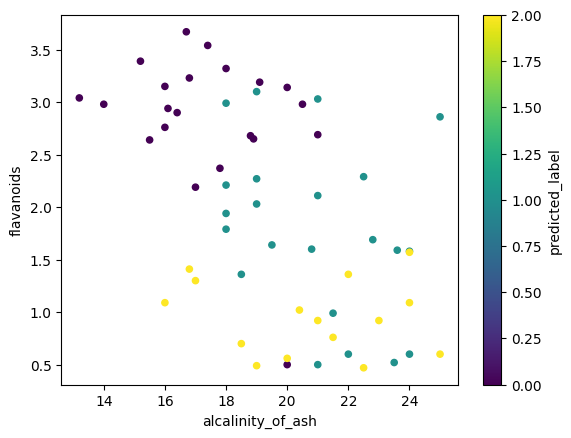

In [67]:
#plot actual label for test data in scatter plot using alcalinity_of_ash and flavanoids on x/y axis
# Scatter Plot
# plt.scatter(df_test['alcalinity_of_ash'], df_test['flavanoids'], c=df_test['actual_label'], colormap='viridis')
# plt.xlabel('alcalinity_of_ash')
# plt.ylabel('flavanoids')
# plt.legend()

df_test.plot.scatter(x='alcalinity_of_ash', y='flavanoids', 
                           c='predicted_label',colormap='viridis',sharex=False)

In [68]:
#Create a new feature 'correct_prediction' 
#with the values 1=correct prediction and 0=wrong prediction
df_test['correct_prediction']= df_test['actual_label']==df_test['predicted_label']
#Transform correct prediction into integer
df_test['correct_prediction']= df_test['correct_prediction'].astype(int)
#show first 10 rows of df_test['correct_prediction']
df_test['correct_prediction'].head(10)

10     1
132    1
165    1
124    1
141    0
58     1
170    1
8      1
116    1
106    1
Name: correct_prediction, dtype: int64

<Axes: xlabel='alcalinity_of_ash', ylabel='flavanoids'>

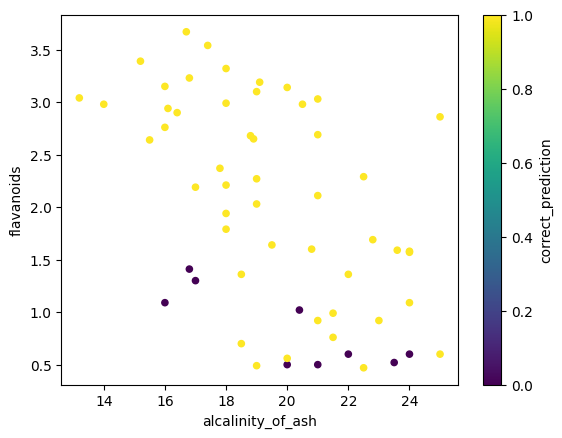

In [69]:
#plot 'correct_prediction' for test data in scatter plot using alcalinity_of_ash and flavanoids on x/y axis
# Scatter Plot
df_test.plot.scatter(x='alcalinity_of_ash', y='flavanoids', 
                           c='correct_prediction',colormap='viridis',sharex=False)

In [73]:
from sklearn.metrics import confusion_matrix, f1_score

#Create a confusion matrix for the actual and predicted labels
confusion_matrix(df_test['actual_label'], df_test['predicted_label'])

array([[20,  0,  0],
       [ 0, 18,  4],
       [ 1,  4, 11]])

In [74]:
f1_score(df_test['actual_label'], df_test['predicted_label'], average='weighted')

0.8425350660625629